# 1. 복습하기

* 테스트 데이터를 사용하지 않고 모델을 평가하기 위해서는 ( 검증 데이터세트 )를 만듭니다.

* ( 교차 검증 )은 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것입니다.

* ( k-폴드 ) 교차 검증 : 교차 검증의 가장 보편적인 방법으로 k개의 데이터 폴드 세트를 만들어서 k번 만큼 각 세트에서 학습과 검증 평가를 반복적으로 수행하여 이 점수를 평균하여 최종 검증 점수를 얻습니다.

* ( 그리드 서치 )는 분류나 회귀 알고리즘에서 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 최적의 파라미터 값을 찾아줍니다.

* 사이킷런에서 제공하는 하이퍼 파라미터 탐색과 교차 검증을 한번에 수행해주는 클래스는? ( sklearn.model_selection.GridSearchCV )

# 2. 앙상블 학습 (Ensemble Learning)

* ( 앙상블 학습 )을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합하여 보다 정확한 최종 예측을 도출하는 기법입니다.

* 어려운 문제의 결론을 내기 위해 여러 명의 전문가가 서로 모여 의견을 수렴하고 결정을 하듯이 ( 앙상블 학습 )은 다양한 분류기의 예측 결과를 결합하여 단일 분류기 보다 신뢰성이 높은 예측값을 얻는 것입니다.

* 이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이고 있지만, 정형 데이터 분류시에는 앙상블이 뛰어난 성능을 보이고 있습니다.

* 앙상블 학습 유형
  * ( 보팅(Voting) ) : 서로 다른 알고리즘을 가진 분류기가 결합하여 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과를 선정
  * ( 배깅(Bagging) ) : 단일 알고리즘을 가진 분류기가 결합하여 샘플링된 데이터 세트로 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과를 선정 (랜덤 포레스트)
  * ( 부스팅(Boosting) ) : 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 다음 분류기에게 가중치(Weight)를 부여하여 학습과 예측을 진행 (XGBoost, LightGBM)

* 보팅은 서로 다른 알고리즘을 기반으로 하지만, 배깅과 부스팅은 대부분 ( DecisionTree ) 알고리즘을 기반으로 합니다.

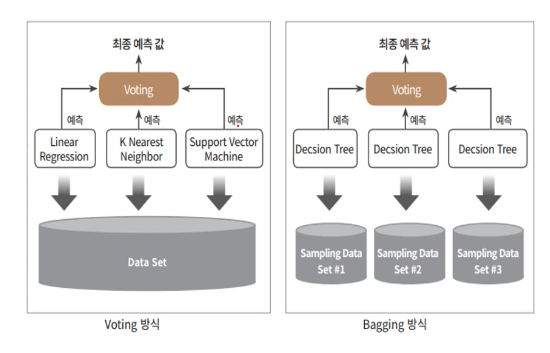

# 3. 랜덤 포레스트 (Random Forest)

* ( 랜덤 포레스트 )는 결정 트리의 쉽고 직관적인 분류기준을 갖는다는 장점은 유지하면서 과대적합에 빠지기 쉬운 단점을 보완하는 배깅의 대표적인 알고리즘입니다.

* 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 여러 개의 데이터 세트를 중첩되게 샘플링한 데이터 세트입니다. 이렇게 여러 개의 데이터 세트를 중첩되게 분리하는 것을 ( 부트스트랩 ) 방식이라고 하고, 이렇게 만들어진 샘플을 ( 부트스트랩 ) 샘플이라고 합니다.

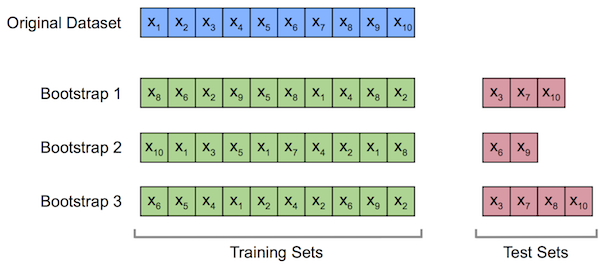

In [1]:
# 사이킷런 데이터셋 모듈 import
from sklearn.datasets import load_breast_cancer

In [2]:
# 데이터 가져오기
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# 데이터셋 설명 보기
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# Feature 이름, Target 이름 보기
# malignant(악성, 0), benign(양성, 1)
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [5]:
# 데이터 shape 확인하기
print(cancer.data.shape)
print(cancer.target.shape)

(569, 30)
(569,)


In [6]:
# 악성(0), 양성(1) 갯수
len(cancer.target[cancer.target==0])

212

In [7]:
# 샘플 데이터 보기
import numpy as np

np.set_printoptions(precision=6, suppress=True)
print(cancer.data[:2])
print(cancer.target[:100])

[[  17.99       10.38      122.8      1001.          0.1184      0.2776
     0.3001      0.1471      0.2419      0.07871     1.095       0.9053
     8.589     153.4         0.006399    0.04904     0.05373     0.01587
     0.03003     0.006193   25.38       17.33      184.6      2019.
     0.1622      0.6656      0.7119      0.2654      0.4601      0.1189  ]
 [  20.57       17.77      132.9      1326.          0.08474     0.07864
     0.0869      0.07017     0.1812      0.05667     0.5435      0.7339
     3.398      74.08        0.005225    0.01308     0.0186      0.0134
     0.01389     0.003532   24.99       23.41      158.8      1956.
     0.1238      0.1866      0.2416      0.186       0.275       0.08902 ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0]


In [8]:
# 데이터 프레임 만들기
import pandas as pd

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

In [9]:
# 앞 데이터 보기
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
# 뒤 데이터 보기
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [11]:
# 열 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
# Target의 갯수 보기
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


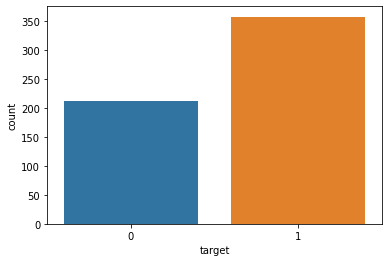

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df.target)
plt.show()

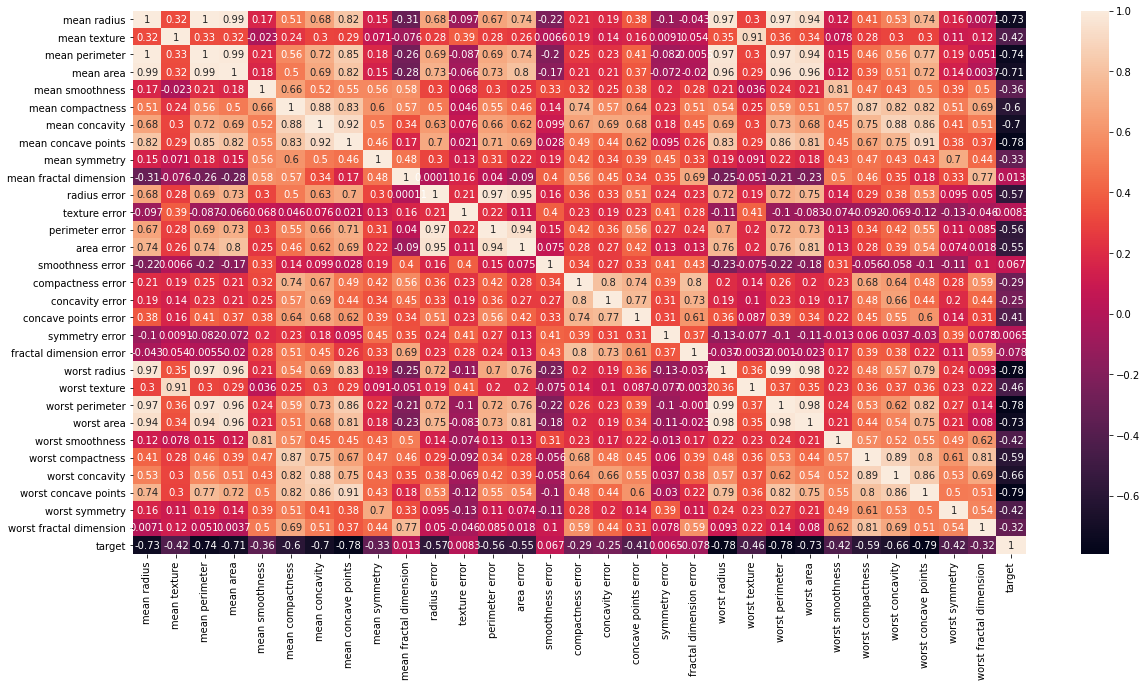

In [14]:
# Heatmap 보기
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [15]:
# 데이터 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=11)

X_train.shape, X_test.shape

((455, 30), (114, 30))

In [16]:
# 학습용, 테이스용 레이블 데이터 보기
print(y_train)
print(y_test)

[0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1
 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1
 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0
 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1
 0 1 1 1 0 1 1 1 0 0 1]
[0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 

In [17]:
# 결정트리 알고리즘
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=11)

dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.9649122807017544


In [18]:
# 랜덤 포레스트 알고리즘
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=11, n_jobs=-1)

rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

1.0
0.9824561403508771


In [19]:
# 특성 중요도
rf.feature_importances_

array([0.036558, 0.01529 , 0.062901, 0.029296, 0.007268, 0.008693,
       0.037204, 0.091762, 0.004663, 0.004642, 0.01589 , 0.003774,
       0.014271, 0.032759, 0.004759, 0.006518, 0.004692, 0.006899,
       0.003684, 0.004159, 0.133744, 0.020123, 0.156831, 0.131152,
       0.019733, 0.018526, 0.022401, 0.08716 , 0.008327, 0.006319])

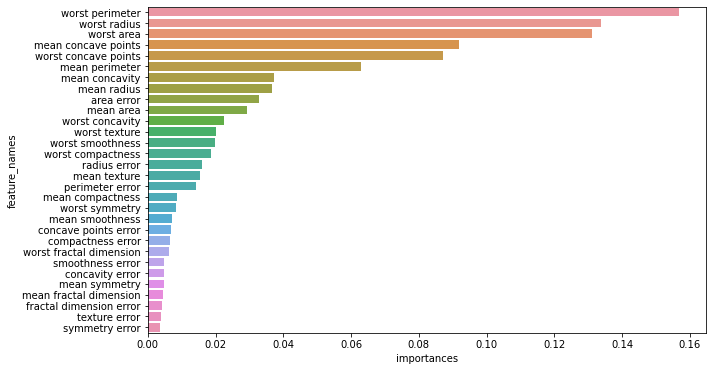

In [33]:
# 특성 중요도 시각화하기
df2 = pd.DataFrame({
  'feature_names':cancer.feature_names,
  'importances':rf.feature_importances_
})
df2.sort_values(by=['importances'], ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=df2.importances, y=df2.feature_names)
plt.show()

# 4. 모델의 성능 평가

* ( 혼동 행렬(Confusion Matrix) ) : 지도 학습으로 훈련된 분류 알고리즘의 성능을 시각화 할 수있는 표

* 앞 문자 T/F는 예측 클래스값과 실제 클래스값이 같은가/틀린가를 의미하고, 뒤의 N/P는 예측 결과값이 부정(0)/긍정(1)을 의미합니다.

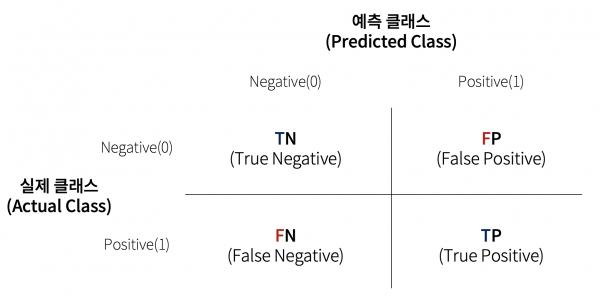

In [35]:
# 테스트 데이터 예측하기
pred = rf.predict(X_test)
pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0])

In [37]:
# 혼동 행렬 보기
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[36,  2],
       [ 0, 76]], dtype=int64)

## 4-1. 정확도(Accuracy)

  * ( 정확도 ) = 예측값과 실제값이 동일한 건수 / 전체 데이터건수

  * ( 정확도 ) = (TN + TP) / (TN + FP + FN + TP)
  
  * 불균형한 레이블 클래스를 가지는 분류 모델에서는 찾아야 하는 매우 적은 수의 결과값에 Positive를 설정해 1값을 부여하고, 그렇지 않은 경우 Negative로 0을 부여함

  * Positive 데이터건수가 매우 작기 때문에 ML 알고리즘은 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로 분류의 정확도가 매우 높게 나타나는 판단 오류를 일으키게 됨

  * Positive 데이터 세트의 예측 성능에 좀더 초점을 맞춘 평가 지표 -> 정밀도, 재현율


In [38]:
# 정확도 보기
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9824561403508771

## 4-2. 정밀도(Precision)

* Positive 데이터 세트의 예측 성능에 좀더 초점을 맞춘 평가 지표

* ( 정밀도 ) = 예측을 Positive로 한 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율

* ( 정밀도 ) = TP / (FP + TP)

In [39]:
# 정밀도 보기
from sklearn.metrics import precision_score
precision_score(y_test, pred)

0.9743589743589743

## 4-3. 재현율 (Recall)

* Positive 데이터 세트의 예측 성능에 좀더 초점을 맞춘 평가 지표

* ( 재현율 ) = 실제값이 Positive인 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율

* ( 재현율 ) = TP / (FN + TP)


In [40]:
# 재현율 보기
from sklearn.metrics import recall_score
recall_score(y_test, pred)

1.0

## 4-4. 정밀도 vs 재현율

* 정밀도 : 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 문제가 될 경우 정밀도가 중요한 지표가 됨, 정밀도는 FP를 낮추는데 초점을 둠

예) 스팸메일 여부 판단 모델

* 재현율 : 실제 Positive 양성인 데이터 예측을 Negative 음성으로 잘못 판단하게 되면 문제가 될 경우 재현율이 중요한 지표가 됨, 재현율은 FN을 낮추는데 초점을 둠

예) 암 판단 모델, 금융 사기 적발 모델

## 4-5. F1 스코어

* ( F1 스코어 )는 정밀도와 재현율을 결합한 지표로 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 높은 값을 가집니다.

* ( F1 스코어 ) = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)


In [44]:
# F1 스코어 직접 계산하기
2*(precision_score(y_test, pred)*recall_score(y_test, pred))/(precision_score(y_test, pred)+recall_score(y_test, pred))

0.9870129870129869

In [45]:
# F1 스코어 보기
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.9870129870129869